In [6]:
import pandas as pd
df = pd.read_json (r'C:\Users\Naim Rihan\Episource/loan_data.json')
df.to_csv (r'C:\Users\Naim Rihan\Episource\new\loan_data.csv', index = None)

In [93]:
df = pd.read_csv (r'C:\Users\Naim Rihan\Episource\new\loan_data.csv')
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


# Question1:

# Find the percentage of total applicants for each unique value of dependents.

In [11]:
df['Dependents'].value_counts(normalize=True) * 100

0     57.534247
2     17.221135
1     16.634051
3+     8.610568
Name: Dependents, dtype: float64

# Question2:

# Find the percentage of applications approved for self-employed applicants.

In [24]:
perc = (((df['Application_Status'] == 'Y') & (df['Self_Employed'] == 'Yes')).sum() / df.shape[0]) * 100
perc

9.001956947162427

# Question3:

# What is the percentage of rejections for married male applicants?

In [139]:
perc = (((df['Application_Status'] == 'N') & (df['Married'] == 'Yes') & (df['Gender'] == 'Male')).sum() / df.shape[0]) * 100
perc

17.025440313111545

# Question4:

# Which property area has the maximum approval ratio?

In [30]:
df['Property_Area'].value_counts(normalize=True) * 100

Semiurban    38.551859
Urban        32.289628
Rural        29.158513
Name: Property_Area, dtype: float64

In [52]:
paMax=df.groupby(['Property_Area','Application_Status']).count()
paMax

Application_ID  Gender  Married  Dependents  \
Property_Area Application_Status                                                
Rural         N                               59      59       59          59   
              Y                               90      90       90          90   
Semiurban     N                               44      44       44          44   
              Y                              153     153      153         153   
Urban         N                               61      61       61          61   
              Y                              104     104      104         104   

                                  Education  Self_Employed  Credit_History  \
Property_Area Application_Status                                             
Rural         N                          59             59              59   
              Y                          90             90              90   
Semiurban     N                          44             44              44   
              Y                         153            153             153   
Urban         N                          61             61              61   
              Y                         104            104             104   

                                  Income  
Property_Area Application_Status          
Rural         N                       59  
              Y                       90  
Semiurban     N                       44  
              Y                      153  
Urban         N                       61  
              Y                      104

In [66]:
df_count = df.groupby('Property_Area')['Application_Status'].apply(lambda x: (x=='Y').sum()).reset_index(name='count')
df_count

,Property_Area,count
0,Rural,90
1,Semiurban,153
2,Urban,104


In [80]:
df_count['Property_Area'].iloc[df_count['count'].argmax()]

'Semiurban'

# Question5:

# Find average number of dependents per income group.

<AxesSubplot:xlabel='Income', ylabel='count'>

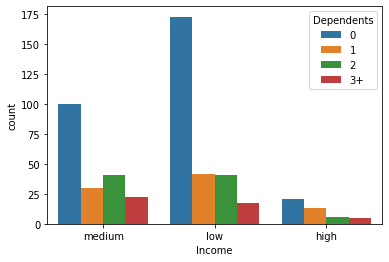

In [85]:
import seaborn as sb
sb.countplot(hue=df.Dependents,x=df.Income)

# Question6:

# Find approval ratio for various combinations of Property_Area and Marrital status

In [167]:
grouped_multipleY = df[df['Application_Status'] == 'Y'].groupby(['Property_Area', 'Married']).agg({'Application_Status': ['count']})

                                                                                                   
grouped_multipleY

Application_Status
                                   count
Property_Area Married                   
Rural         No                      34
              Yes                     56
Semiurban     No                      47
              Yes                    106
Urban         No                      30
              Yes                     74

In [168]:
grouped_multipleY['Approval_ratio'] = df[df['Application_Status'] == 'Y'].groupby(['Property_Area', 'Married']).sum() / df.shape[0] * 100
grouped_multipleY

Application_Status Approval_ratio
                                   count               
Property_Area Married                                  
Rural         No                      34       6.457926
              Yes                     56      10.763209
Semiurban     No                      47       8.806262
              Yes                    106      20.352250
Urban         No                      30       5.870841
              Yes                     74      14.285714

In [171]:
res = grouped_multipleY.reset_index()
res

,Property_Area,Married,Application_Status,Approval_ratio
,,,count,
0,Rural,No,34,6.457926
1,Rural,Yes,56,10.763209
2,Semiurban,No,47,8.806262
3,Semiurban,Yes,106,20.352250
4,Urban,No,30,5.870841
5,Urban,Yes,74,14.285714


In [181]:
res.columns = ['Property_Area', 'Marital_Status', 'Number_of_applicants', 'Approval_ratio']
res

,Property_Area,Marital_Status,Number_of_applicants,Approval_ratio
0,Rural,No,34,6.457926
1,Rural,Yes,56,10.763209
2,Semiurban,No,47,8.806262
3,Semiurban,Yes,106,20.352250
4,Urban,No,30,5.870841
5,Urban,Yes,74,14.285714


In [185]:
res["Marital_Status"] = res["Marital_Status"].apply(lambda x: x.replace("No", "Unmarried"))
res["Marital_Status"] = res["Marital_Status"].apply(lambda x: x.replace("Yes", "Married"))
res

,Property_Area,Marital_Status,Number_of_applicants,Approval_ratio
0,Rural,Unmarried,34,6.457926
1,Rural,Married,56,10.763209
2,Semiurban,Unmarried,47,8.806262
3,Semiurban,Married,106,20.352250
4,Urban,Unmarried,30,5.870841
5,Urban,Married,74,14.285714


# Question7:

# Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.

# Build a predictive model

# 1- Data Preparation

In [193]:
# drop Nan values if there any

df.dropna()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [195]:
#Remove punctuations:

def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass
    return x

df.apply(remove_punctuation)


C:\Users\NAIMRI~1\AppData\Local\Temp/ipykernel_11144/2514556633.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  x = x.str.replace('[^\w\s]','')


,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [197]:
#Drop all duplicate rows if there any

df.drop_duplicates(keep=False, inplace=True)
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


# 2- Encoding the data

convert the data to machine form


In [198]:
from sklearn.preprocessing import LabelEncoder
column=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income','Application_Status']
le= LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i])

In [199]:
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,1,0,0,0,0,1,2,2,1
1,LP001003,1,1,1,0,0,1,0,2,0
2,LP001005,1,1,0,0,1,1,2,1,1
3,LP001006,1,1,0,1,0,1,2,1,1
4,LP001008,1,0,0,0,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,0,0,0,0,0,1,0,1,1
507,LP002979,1,1,3,0,0,1,0,2,1
508,LP002983,1,1,1,0,0,1,2,2,1
509,LP002984,1,1,2,0,0,1,2,2,1


# 2- Choosing X,Y and splitting data to train and test

In [207]:
from sklearn.model_selection import train_test_split

x=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y=df.Application_Status
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=7)

In [245]:
x_test.dtypes

Gender            int32
Married           int32
Dependents        int32
Education         int32
Self_Employed     int32
Credit_History    int64
Property_Area     int32
Income            int32
dtype: object

# 3- Training the models (Classifiers)

In [224]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
  
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()
  
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 85.7843137254902
Accuracy score of  KNeighborsClassifier = 79.16666666666666
Accuracy score of  SVC = 78.92156862745098
Accuracy score of  LogisticRegression = 78.92156862745098


In [226]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_test)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 86.40776699029125
Accuracy score of  KNeighborsClassifier = 80.58252427184466
Accuracy score of  SVC = 88.3495145631068
Accuracy score of  LogisticRegression = 88.3495145631068


In [234]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, Y_pred)
cf_matrix

array([[17, 12],
       [ 0, 74]], dtype=int64)

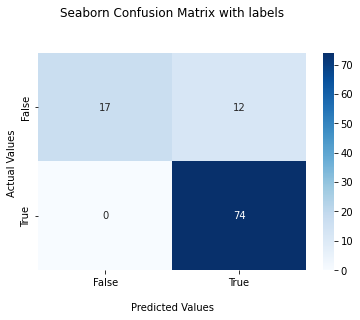

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 4- Predict the result on new instances

In [277]:
value1 = input("Please enter the client's gender:\n")
value2 = input("Please enter the client's marital status :\n")
value3 = input("Please enter the number of the client's dependents:\n")
value4 = input("Please enter the client's education:\n")
value5 = input("Is he/she self employed?:\n")
value6 = input("What's his/her credit history?:\n")
value7 = input("What's his/her property area:\n")
value8 = input("What's his/her income level:\n")

Lista = [[enca(value1),enca(value2),value3,enca(value4),enca(value5),value6,enca(value7),enca(value8)]]

X=np.array(Lista).reshape(1,-1)

new_predictions = lc.predict(X)
ZZ=int(new_predictions) 
result= matcher(ZZ)
pp= lc.predict_proba(X)
print(f'The result of the prediction {result}')   
print(f'with prediction probability {pp}')   

#Xnew = [['Male', 'Yes',3,'Graduate','No',1,'Rural','medium']]


Please enter the client's gender:
Male
Please enter the client's marital status :
Yes
Please enter the number of the client's dependents:
3
Please enter the client's education:
Graduate
Is he/she self employed?:
No
What's his/her credit history?:
1
What's his/her property area:
Rural
What's his/her income level:
medium
The result of the prediction  Application_Status : Approved
with prediction probability [[0.18890272 0.81109728]]


C:\Users\Naim Rihan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Naim Rihan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [276]:
# An auxiliary function for converting a numeric result into a comprehensible result

def matcher(i):
    switcher={ 
        
            1: " Application_Status : Approved",
            
            0: " Application_Status : Rejected",
            
             }
    return switcher.get(i,"unspecified")

In [237]:
# A helper function that plays the role of an encoder instead of ordinal encoder,
#because ordinal encoder does not encode a single row, but it requires many rows.

def enca(x):
    return {
        'Male': 1,
        'Female':0,
        'Yes':1,
        'No':0,
        'Graduate':1,
        'Not Graduate':0,
        'Urban':2,
        'Rural':0,
        'Semiurban':1,
        'medium':2,
        'low':1,
        'high':0,
        
         }.get(x, 0.0)  
        